#### Libraries

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#### Variables

In [6]:
data_filepath = 'data/DisasterDeclarationsSummaries.csv'

#### Suppress Warning

In [28]:
warnings.simplefilter(action='ignore', category=FutureWarning)

#### Read Data

In [8]:
df = pd.read_csv(data_filepath)

#### Display first 5 rows

In [12]:
# Display the first 5 rows
df.head()

,femaDeclarationString,disasterNumber,state,declarationType,declarationDate,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,...,tribalRequest,fipsStateCode,fipsCountyCode,placeCode,designatedArea,declarationRequestNumber,lastIAFilingDate,lastRefresh,hash,id
0,FM-5465-NM,5465,NM,FM,2023-05-10T00:00:00.000Z,2023,Fire,LAS TUSAS FIRE,0,0,...,0,35,33,99033,Mora (County),23050,NaN,2023-05-22T03:41:22.800Z,56e2cdd7de53fd6bd0cbe22cd681d0d87708d0ac,e46df225-24a5-4178-9368-0f1c753f8748
1,FM-5465-NM,5465,NM,FM,2023-05-10T00:00:00.000Z,2023,Fire,LAS TUSAS FIRE,0,0,...,0,35,47,99047,San Miguel (County),23050,NaN,2023-05-22T03:41:22.800Z,33f747f70112aed4df749cfb1dd58f1d50f029ff,c8660535-8995-4187-af20-771b5669d4b7
2,FM-5464-RI,5464,RI,FM,2023-04-14T00:00:00.000Z,2023,Fire,QUEENS RIVER FIRE,0,0,...,0,44,9,99009,"Washington (County)(in (P)MSA 5520,6480)",23042,NaN,2023-05-22T03:41:22.800Z,1111d4d4a33f8a6e4d383ac5bd0e60b9bf142da0,9b9a9d9c-8b03-4049-9b16-a3c0d581556c
3,FM-5463-KS,5463,KS,FM,2023-04-13T00:00:00.000Z,2023,Fire,HADDAM FIRE,0,0,...,0,20,201,99201,Washington (County),23038,NaN,2023-05-22T03:41:22.800Z,78dd55a181f146622eb65835b5d794689d1ea7f2,57d936ce-a0d7-412a-9d78-18aee530c146
4,FM-5462-NE,5462,NE,FM,2023-04-09T00:00:00.000Z,2023,Fire,WACONDA-BEAVER LAKE FIRE COMPLEX,0,0,...,0,31,25,99025,Cass (County),23036,NaN,2023-05-22T03:41:22.800Z,5b35b5912f606a21ff29194317052ac7c2541be8,69325b2c-77cf-493f-8f1a-d5b5a737edf8


#### Get Number of Rows and Columns

In [14]:
# Get the shape of the dataframe
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 64885
Number of columns: 25


#### Show data types and number of null values
We can see that lastIAFilingDate, disasterCloseoutDate, and incidentEndDate have null values
- lastIAFilingDate - This data is available after 1998.  We will investigate to see if this explains all the nulls for this variable.
- incidentEndDate - Could be explained by incidents that have not yet ended
- disasterCloseoutDate - Could be explained by disasters not closed out

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64885 entries, 0 to 64884
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   femaDeclarationString     64885 non-null  object
 1   disasterNumber            64885 non-null  int64 
 2   state                     64885 non-null  object
 3   declarationType           64885 non-null  object
 4   declarationDate           64885 non-null  object
 5   fyDeclared                64885 non-null  int64 
 6   incidentType              64885 non-null  object
 7   declarationTitle          64885 non-null  object
 8   ihProgramDeclared         64885 non-null  int64 
 9   iaProgramDeclared         64885 non-null  int64 
 10  paProgramDeclared         64885 non-null  int64 
 11  hmProgramDeclared         64885 non-null  int64 
 12  incidentBeginDate         64885 non-null  object
 13  incidentEndDate           64351 non-null  object
 14  disasterCloseoutDate  

#### Determine number of null values
- lastIAFilingDate: 46899
- incidentEndDate: 534
- disasterCloseoutDate: 16180

In [16]:
df.isnull().sum()

femaDeclarationString           0
disasterNumber                  0
state                           0
declarationType                 0
declarationDate                 0
fyDeclared                      0
incidentType                    0
declarationTitle                0
ihProgramDeclared               0
iaProgramDeclared               0
paProgramDeclared               0
hmProgramDeclared               0
incidentBeginDate               0
incidentEndDate               534
disasterCloseoutDate        16180
tribalRequest                   0
fipsStateCode                   0
fipsCountyCode                  0
placeCode                       0
designatedArea                  0
declarationRequestNumber        0
lastIAFilingDate            46899
lastRefresh                     0
hash                            0
id                              0
dtype: int64

#### Summary stats for numeric columns

In [17]:
df.describe()

,disasterNumber,fyDeclared,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,tribalRequest,fipsStateCode,fipsCountyCode,placeCode,declarationRequestNumber
count,64885.000000,64885.000000,64885.000000,64885.000000,64885.000000,64885.000000,64885.000000,64885.000000,64885.000000,64885.000000,64885.000000
mean,2601.128504,2004.568252,0.167342,0.264884,0.932789,0.436187,0.002050,31.550358,97.105880,96394.886846,34880.007475
std,1414.472936,14.837208,0.373284,0.441275,0.250389,0.495915,0.045228,16.618886,102.291883,13880.922895,34766.602871
min,1.000000,1953.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000
25%,1328.000000,1997.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,31.000000,99029.000000,8168.000000
50%,3097.000000,2007.000000,0.000000,0.000000,1.000000,0.000000,0.000000,30.000000,75.000000,99071.000000,20035.000000
75%,3558.000000,2018.000000,0.000000,1.000000,1.000000,1.000000,0.000000,46.000000,127.000000,99123.000000,73104.000000
max,5486.000000,2023.000000,1.000000,1.000000,1.000000,1.000000,1.000000,78.000000,840.000000,99507.000000,99159.000000


#### Summary stats for categorical columns
Observations
- TX had the most emergencies at 5196 total emergencies
- There are 43,882 major disasters (DR), 19,101 emergency declarations (EM), and 1,902 Fire Management Assistance Declaration (FM)
- There were 3,692 incidences on 2020-03-13.  My assumption is COVID but will investigate further.
- The most common incidences are Severe Storms at 17,836
- The most common incident title is COVID-19 PANDEMIC at 4,165

In [18]:
# Loop through each categorical column and display its value counts
for column in df.select_dtypes(include=['object']).columns:
    print(column)
    print(df[column].value_counts())
    print("-----")

femaDeclarationString
femaDeclarationString
DR-4522-ME    443
EM-3458-TX    257
DR-4485-TX    257
DR-1239-TX    257
EM-3261-TX    255
             ... 
DR-1666-AK      1
DR-1667-MO      1
FM-2815-TX      1
FM-2814-TX      1
EM-3580-NM      1
Name: count, Length: 4818, dtype: int64
-----
state
state
TX    5196
MO    2735
KY    2693
VA    2524
OK    2505
LA    2498
FL    2451
GA    2306
NC    2096
PR    1987
MS    1939
IA    1855
KS    1760
AL    1675
TN    1670
CA    1648
AR    1609
MN    1589
NY    1512
NE    1486
IN    1464
SD    1441
ND    1380
IL    1303
OH    1281
PA    1239
WV    1232
ME    1045
SC     993
WA     986
WI     892
MI     796
CO     655
NJ     626
MT     614
OR     589
NM     517
MD     447
MA     412
VT     366
ID     361
AZ     337
AK     325
NH     306
NV     280
CT     255
UT     249
WY     129
RI     115
HI     107
VI      80
AS      76
MP      71
DE      53
MH      53
FM      31
DC      23
GU      21
PW       1
Name: count, dtype: int64
-----
declarationType
dec

#### Clean Data

In [95]:
# Convert 'declarationDate' column to datetime format
df['declarationDate'] = pd.to_datetime(df['declarationDate'])

# Extract the month from the declarationDate and create a new column 'monthDeclared'
df['monthDeclared'] = df['declarationDate'].dt.month

# Change COVID-19 PANDEMIC to COVID-19 (These should be classified under one title)
df['declarationTitle'] = df['declarationTitle'].replace("COVID-19 PANDEMIC", "COVID-19")
df['declarationTitle'] = df['declarationTitle'].replace("SEVERE STORMS & FLOODING", "SEVERE STORMS AND FLOODING")

# Calculate the open duration for each disaster
df['openDuration'] = (pd.to_datetime(df['disasterCloseoutDate']) - pd.to_datetime(df['incidentBeginDate'])).dt.days

# Calculate incident duration for each disaster
df['incidentDuration'] = (pd.to_datetime(df['incidentEndDate']) - pd.to_datetime(df['incidentBeginDate'])).dt.days

#### Number of disaster declarations per year

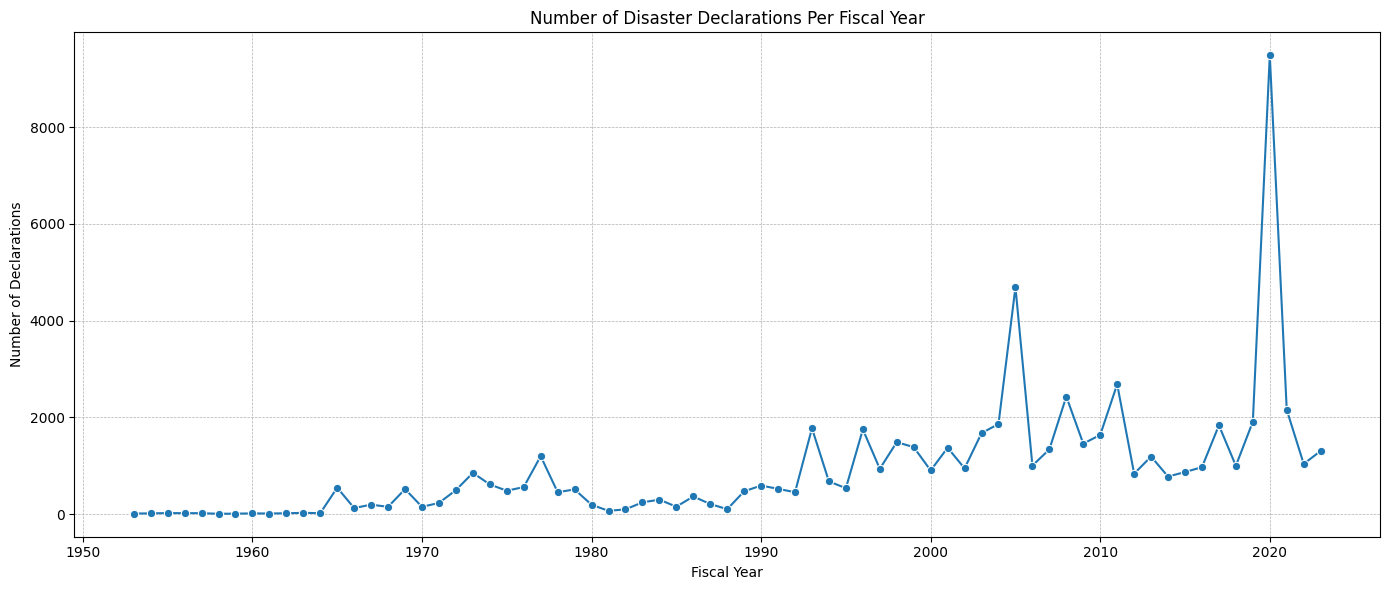

In [29]:
# Count the number of disaster declarations per fiscal year
fy_counts = df['fyDeclared'].value_counts().sort_index()

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(x=fy_counts.index, y=fy_counts.values, marker='o')

plt.title('Number of Disaster Declarations Per Fiscal Year')
plt.xlabel('Fiscal Year')
plt.ylabel('Number of Declarations')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()

#### Number of disaster declarations per year by declaration type

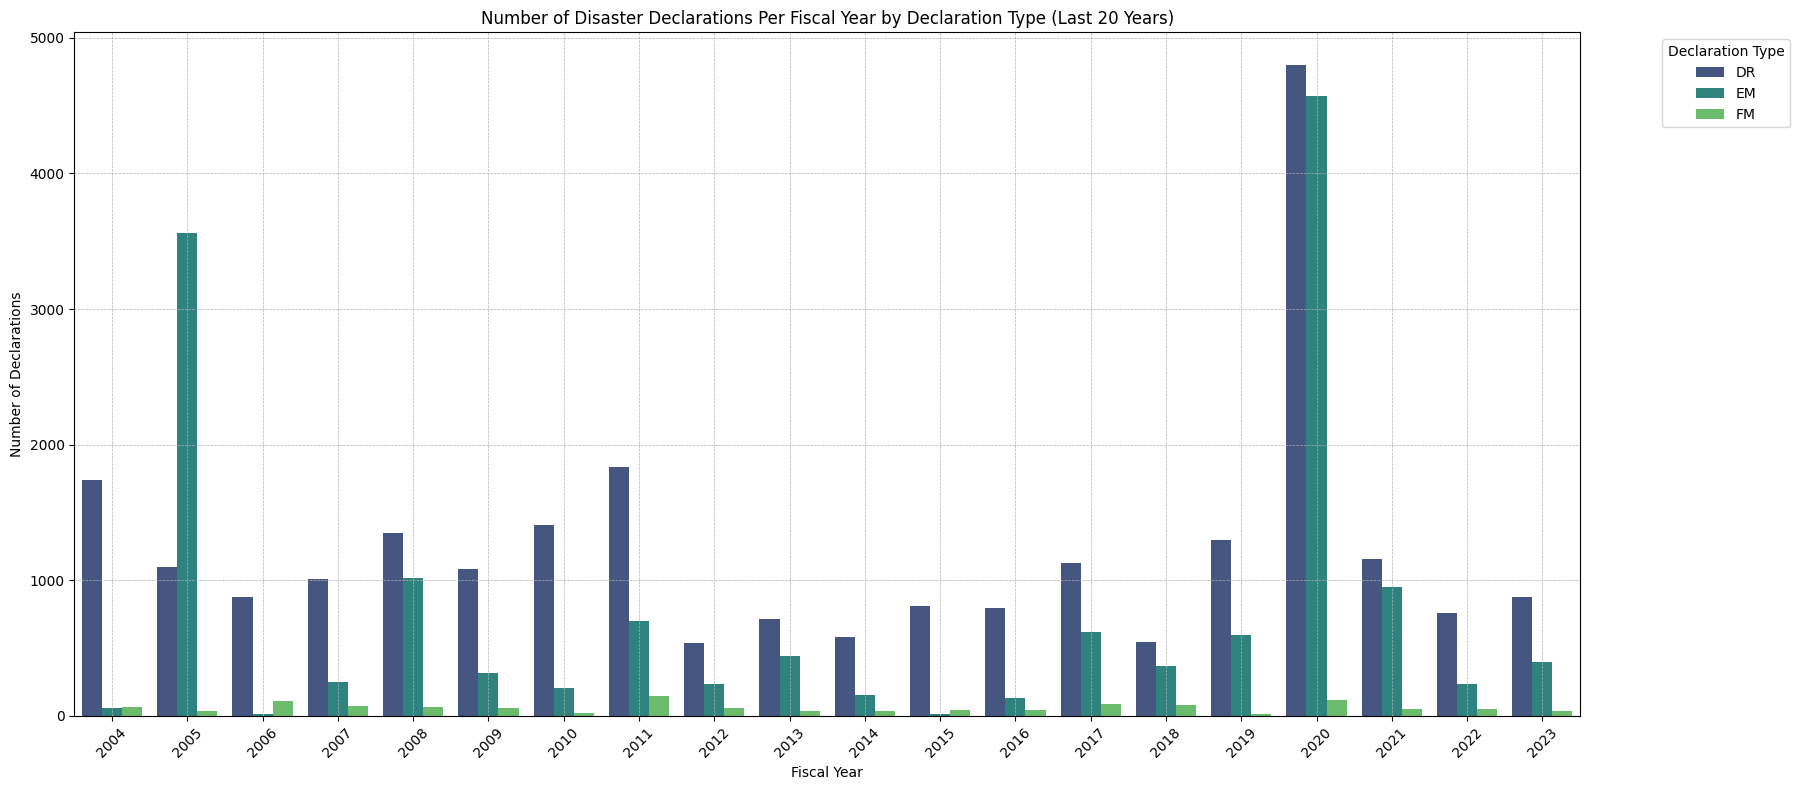

In [31]:
# Get the latest fiscal year
latest_fy = df['fyDeclared'].max()

# Filter the dataframe to include only the last 20 years
filtered_df = df[df['fyDeclared'] > latest_fy - 20]

# Group by fiscal year and declaration type, then count the number of occurrences
grouped_counts = filtered_df.groupby(['fyDeclared', 'declarationType']).size().reset_index(name='count')

# Plot
plt.figure(figsize=(16, 8))
sns.barplot(x='fyDeclared', y='count', hue='declarationType', data=grouped_counts, palette="viridis")

plt.title('Number of Disaster Declarations Per Fiscal Year by Declaration Type (Last 20 Years)')
plt.xlabel('Fiscal Year')
plt.ylabel('Number of Declarations')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Declaration Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

#### Number of Each Declaration Title in 2020
As expected, COVID-19 accounted for most emergencies in 2020

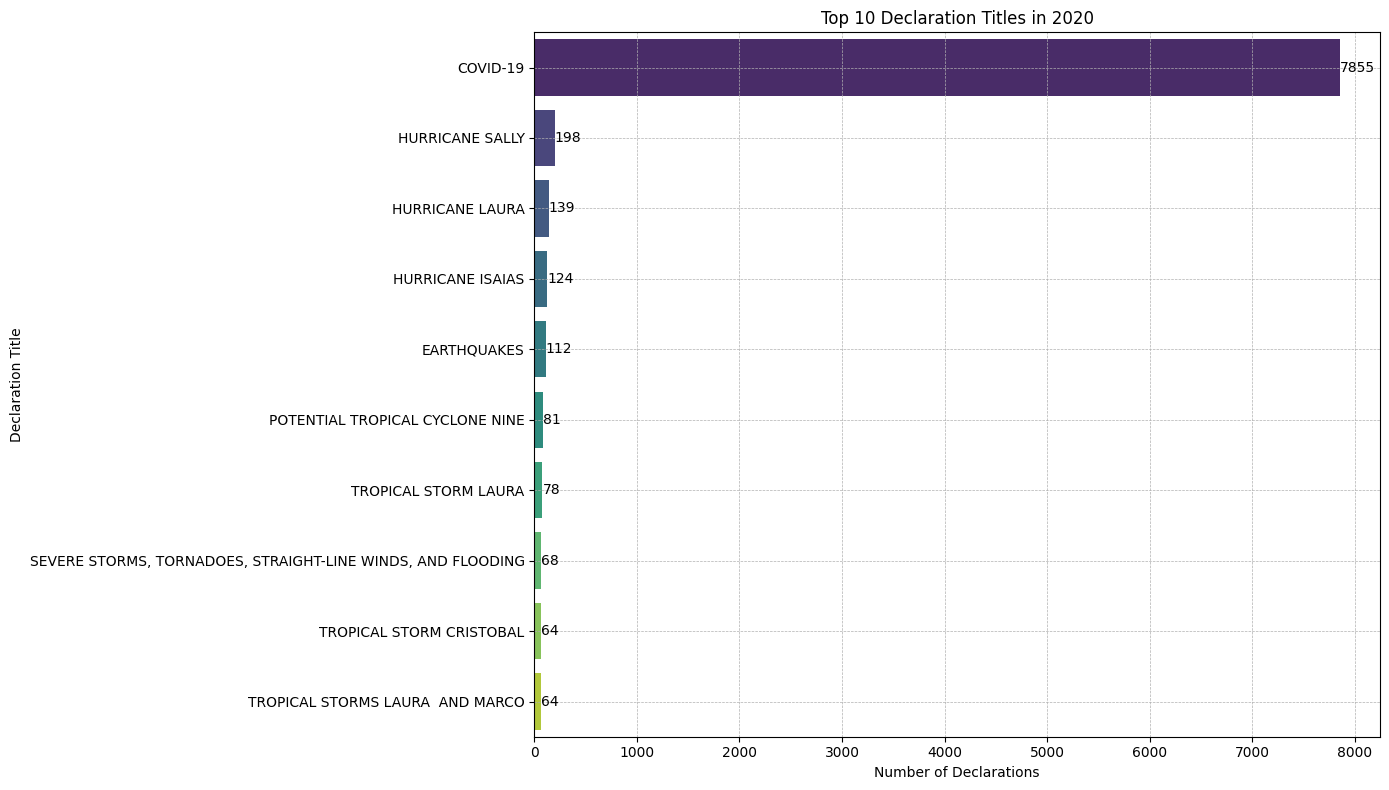

In [37]:
# Filter the dataframe for the year 2020
df_2020 = df[df['fyDeclared'] == 2020]

# Count the number of each declaration title and get top 10
title_counts = df_2020['declarationTitle'].value_counts().reset_index().head(10)
title_counts.columns = ['declarationTitle', 'count']

# Plot
plt.figure(figsize=(14, 8))
ax = sns.barplot(y='declarationTitle', x='count', data=title_counts, palette="viridis")

# Annotate each bar with its respective count
for index, value in enumerate(title_counts['count']):
    ax.text(value, index, str(value), color='black', ha="left", va="center", fontsize=10)

plt.title('Top 10 Declaration Titles in 2020')
plt.xlabel('Number of Declarations')
plt.ylabel('Declaration Title')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()

#### Top 10 states with most disaster declarations

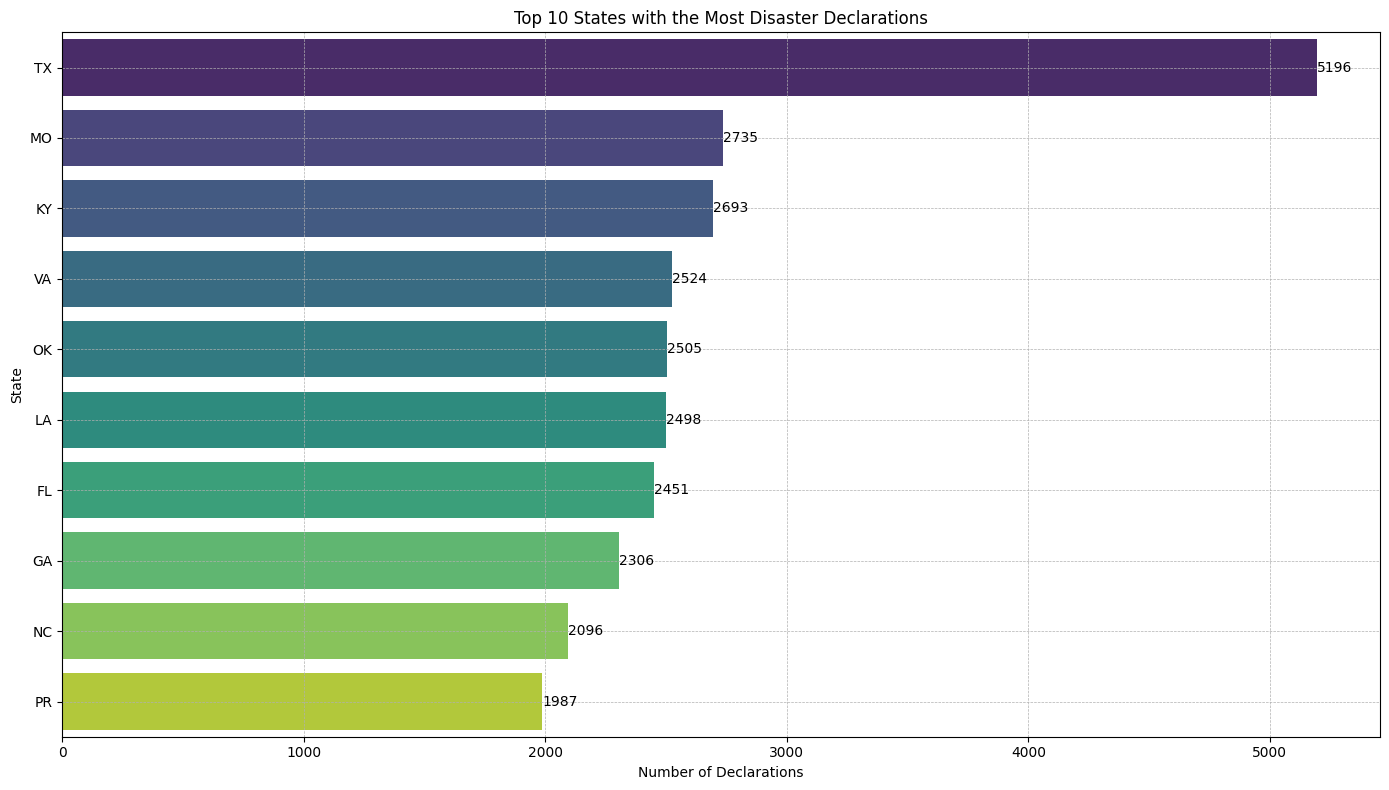

In [38]:
# Count the number of disaster declarations for each state and get the top 10
state_counts = df['state'].value_counts().head(10).reset_index()
state_counts.columns = ['State', 'Count']

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Count', y='State', data=state_counts, palette="viridis")

plt.title('Top 10 States with the Most Disaster Declarations')
plt.xlabel('Number of Declarations')
plt.ylabel('State')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Annotate each bar with its respective count
for index, value in enumerate(state_counts['Count']):
    plt.text(value, index, str(value), color='black', ha="left", va="center", fontsize=10)

plt.show()

#### Most frequent disasters amonst the top 10 states with most disasters

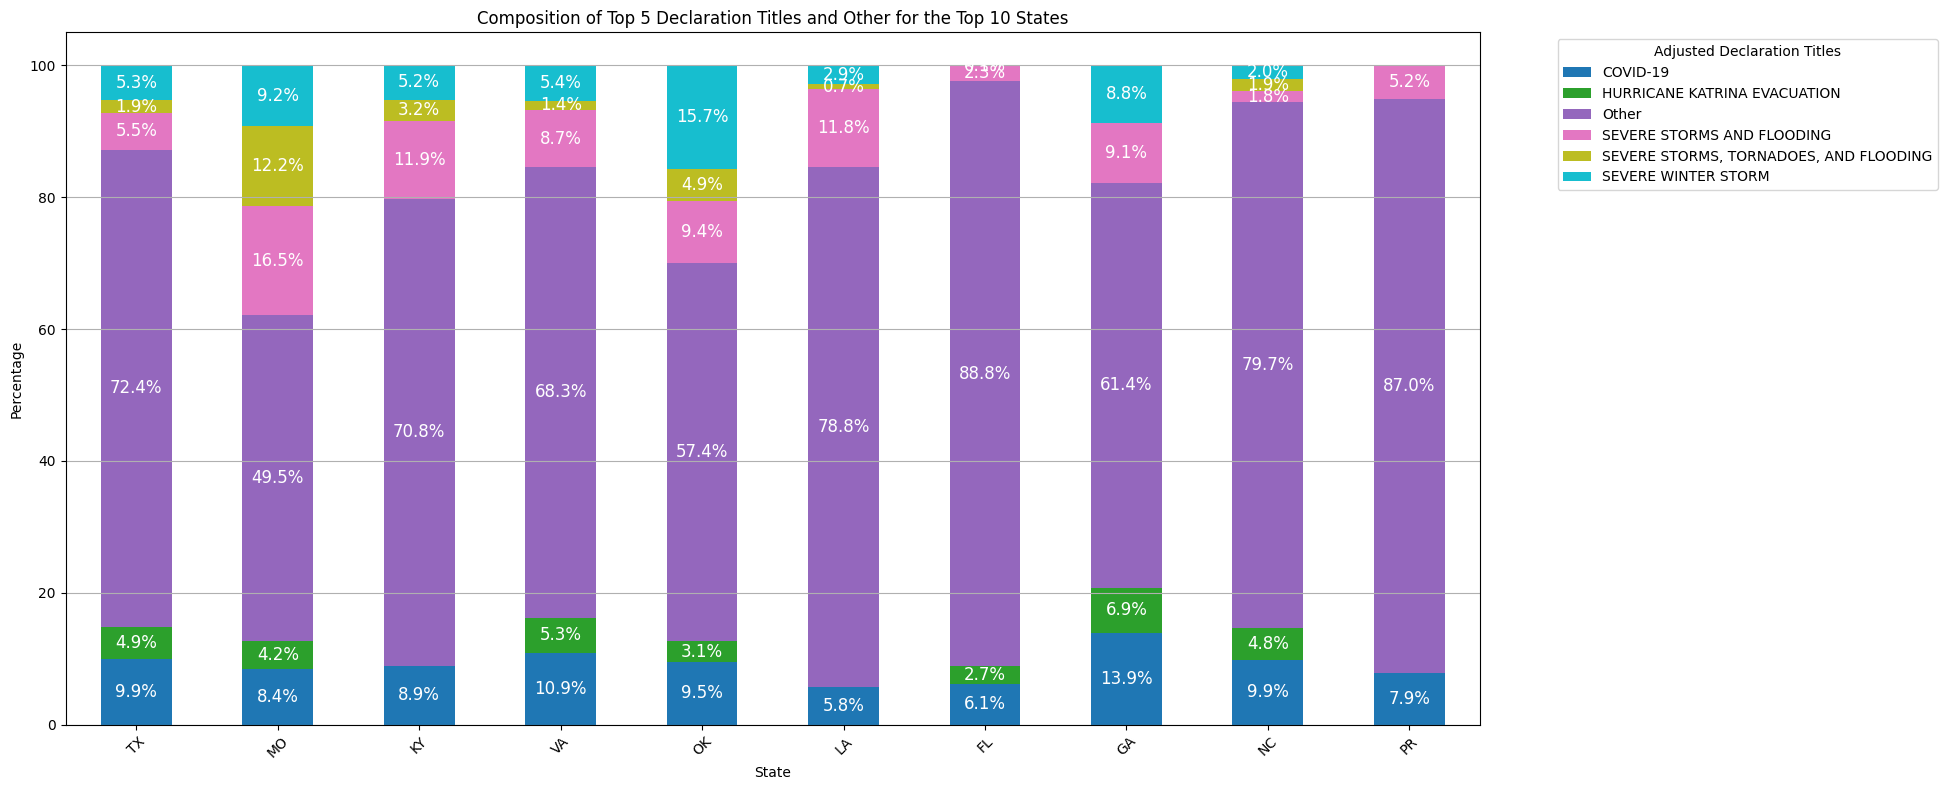

In [53]:
# Identify the top 5 declaration titles globally
top_titles = df['declarationTitle'].value_counts().head(5).index.tolist()

# Replace other titles with "Other"
df['AdjustedTitle'] = df['declarationTitle'].where(df['declarationTitle'].isin(top_titles), 'Other')

# Pivot table to get counts of each AdjustedTitle by state
pivot_data = df.groupby(['state', 'AdjustedTitle']).size().unstack().fillna(0)

# Sort by total declarations and take top 10 states
pivot_data['Total'] = pivot_data.sum(axis=1)
top_states = pivot_data.sort_values(by='Total', ascending=False).head(10).drop(columns='Total')

# Convert counts to percentages
top_states_percentage = top_states.div(top_states.sum(axis=1), axis=0) * 100

# Plotting the stacked bar chart
ax = top_states_percentage.plot(kind='bar', stacked=True, figsize=(15, 8), colormap="tab10")

plt.title('Composition of Top 5 Declaration Titles and Other for the Top 10 States')
plt.xlabel('State')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Annotate the bar segments with their respective percentages
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    if height > 0: # to ensure we don't display annotations for segments with 0% (if any)
        ax.annotate(f'{height:.1f}%', (p.get_x() + width/2, p.get_y() + height/2),
                     ha='center', va='center', fontsize=12, color='white') # increased font size to 12

plt.tight_layout()
plt.legend(title='Adjusted Declaration Titles', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

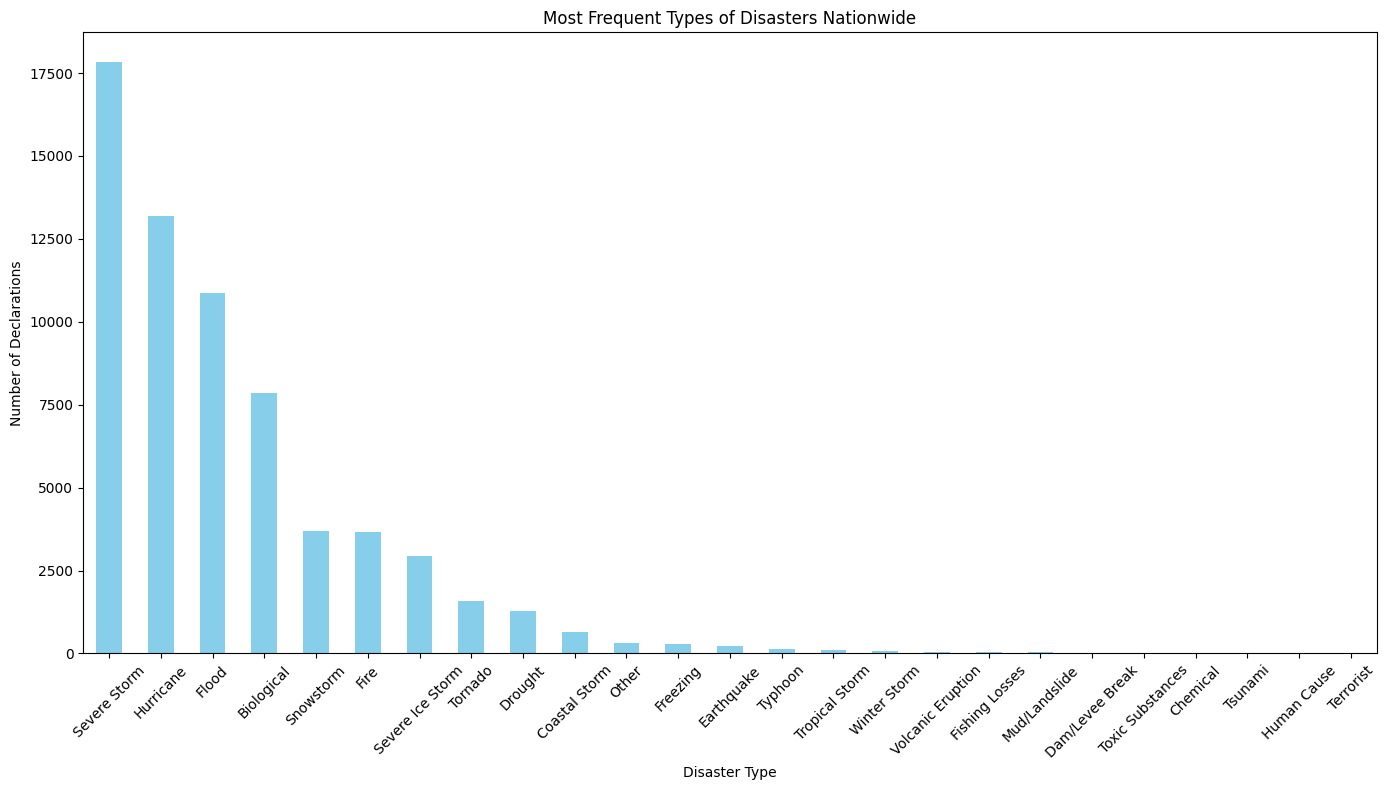

In [54]:
# Nationwide Overview
plt.figure(figsize=(14, 8))
df['incidentType'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Most Frequent Types of Disasters Nationwide')
plt.xlabel('Disaster Type')
plt.ylabel('Number of Declarations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

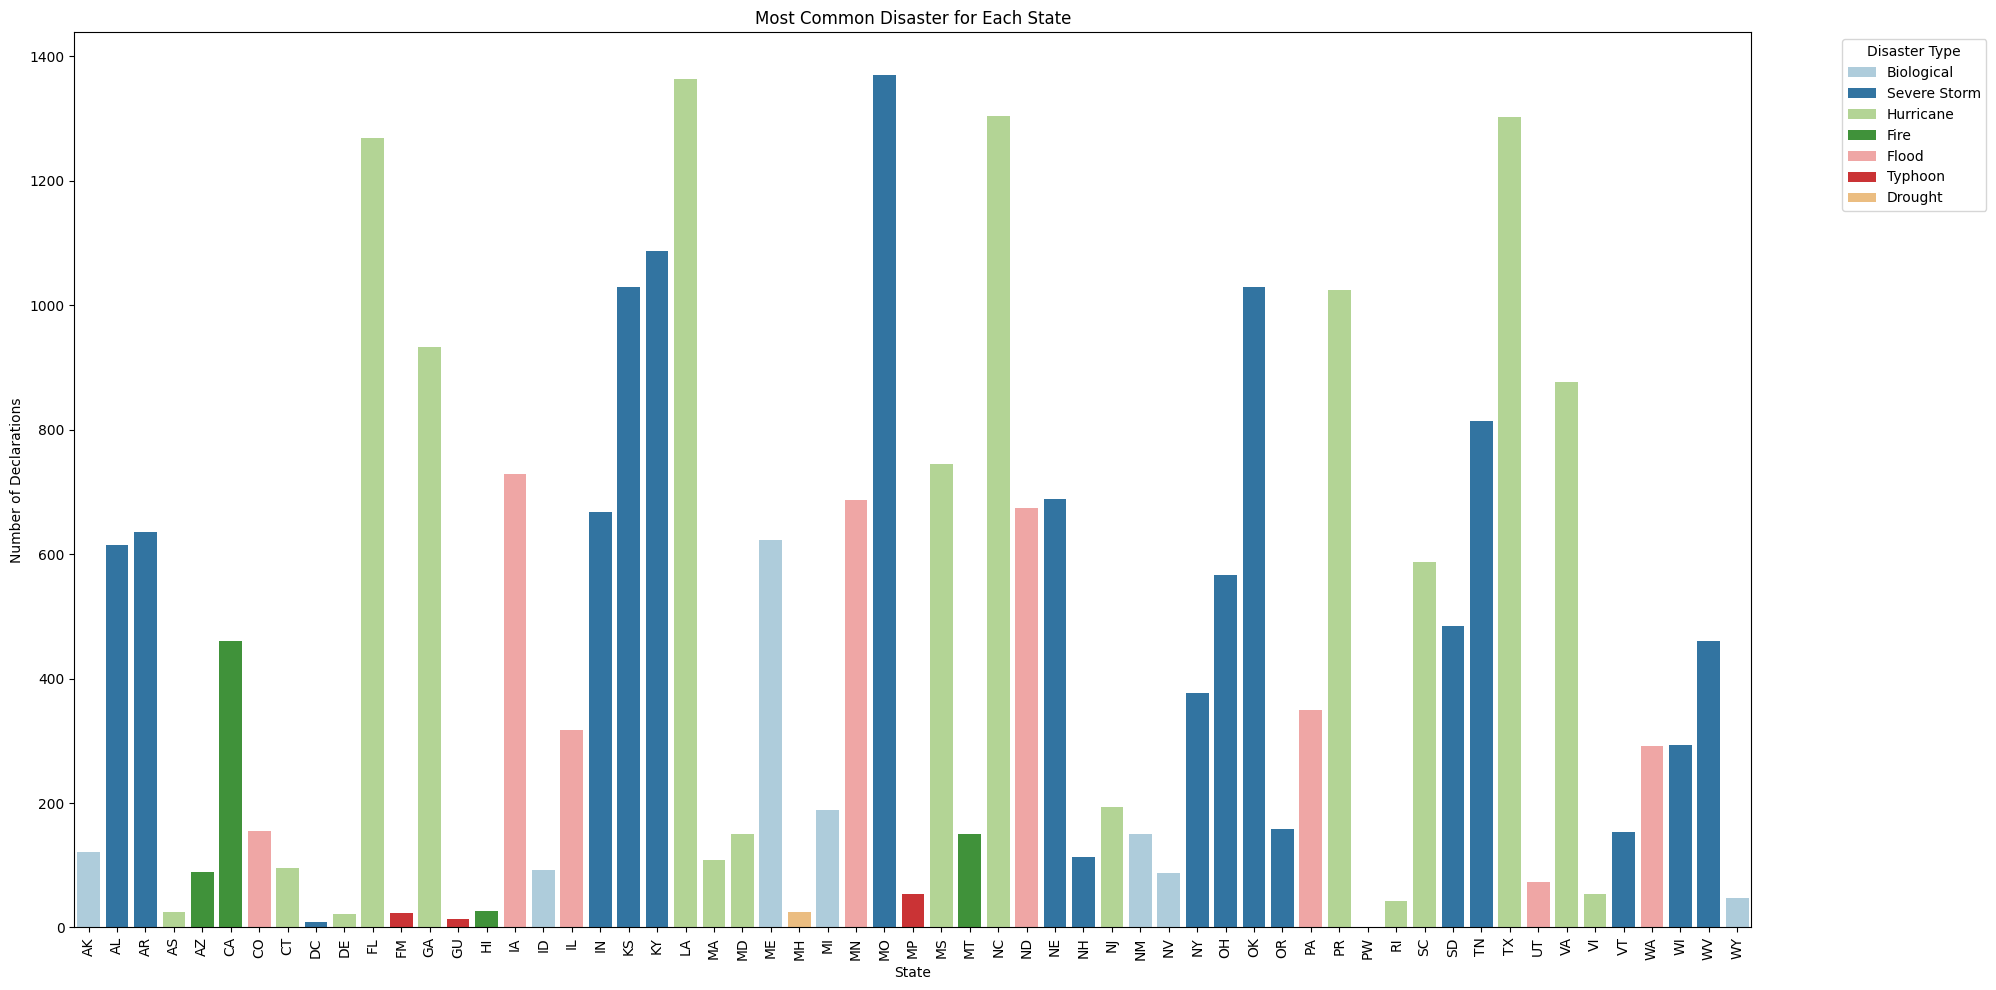

In [58]:
# Calculate the most common disaster for each state
grouped = df.groupby(['state', 'incidentType']).size().reset_index(name='count')
grouped = grouped.sort_values(['state', 'count'], ascending=[True, False])
top_disasters = grouped.groupby('state').first().reset_index()

# Set a color palette with as many colors as there are unique disasters
num_disasters = top_disasters['incidentType'].nunique()
color_palette = sns.color_palette("Paired", num_disasters)

# Plot the result
plt.figure(figsize=(20, 10))
sns.barplot(x='state', y='count', hue='incidentType', data=top_disasters, dodge=False, palette=color_palette)

plt.title('Most Common Disaster for Each State')
plt.xlabel('State')
plt.ylabel('Number of Declarations')
plt.xticks(rotation=90)
plt.legend(title='Disaster Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

#### Most frequent declaration month for disasters nationwide
March and September have the highest number of declarations

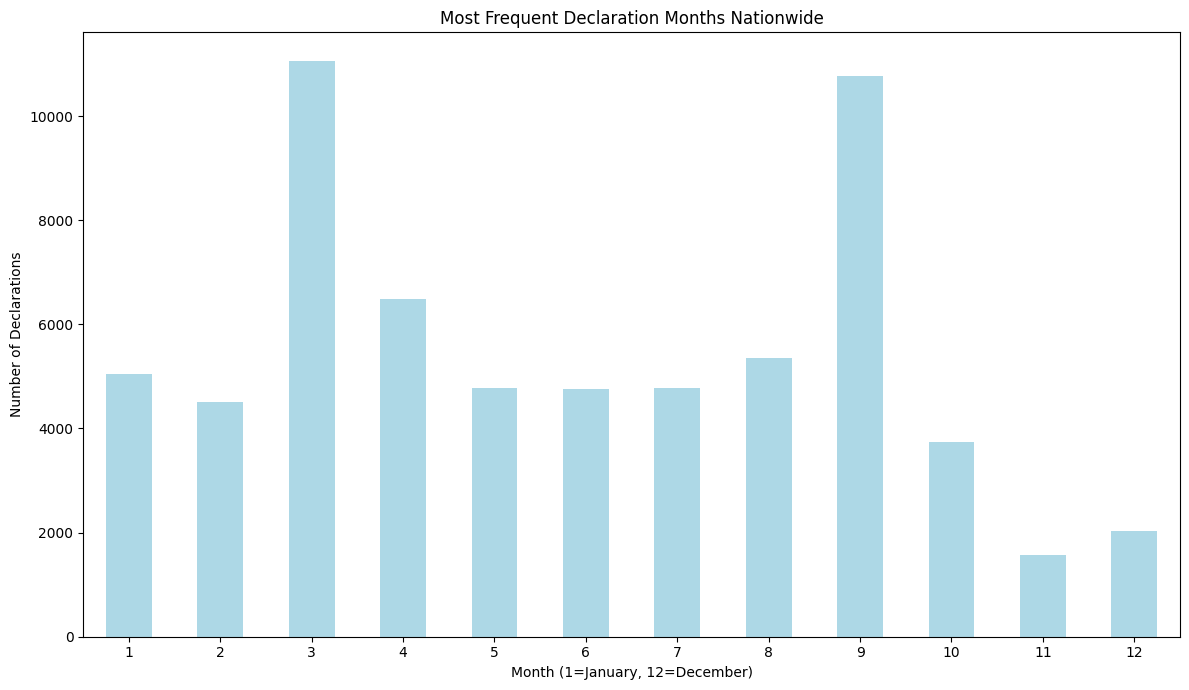

In [69]:
plt.figure(figsize=(12, 7))
df['monthDeclared'].value_counts().sort_index().plot(kind='bar', color='lightblue')
plt.title('Most Frequent Declaration Months Nationwide')
plt.xlabel('Month (1=January, 12=December)')
plt.ylabel('Number of Declarations')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Percentage of declaration titles for each month
There are spikes in March and September due to COVID and Hurricane Katrina

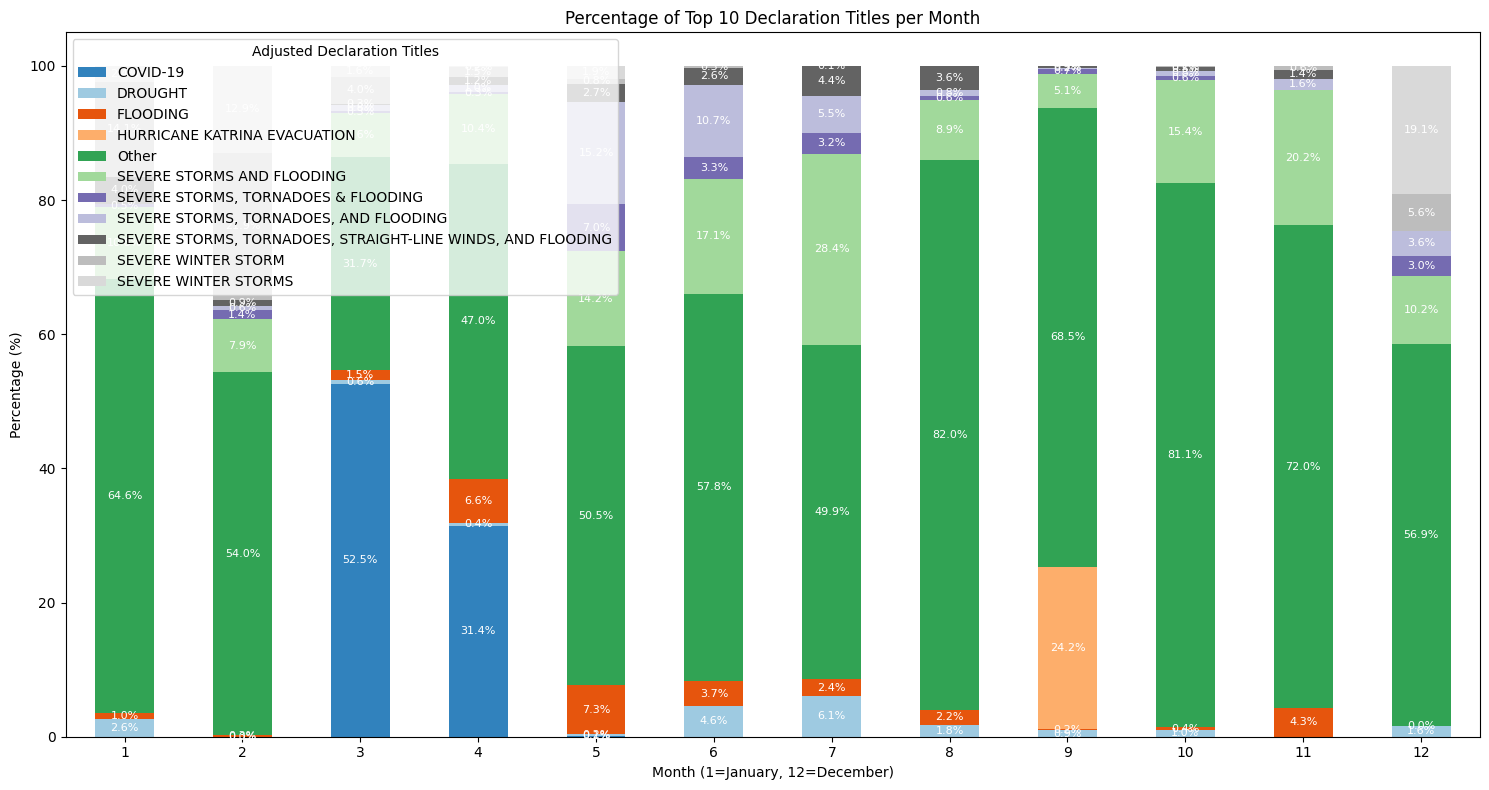

In [77]:
# 1. Extract month from declarationDate
df['monthDeclared'] = pd.to_datetime(df['declarationDate']).dt.month

# 2. Identify top 10 declaration titles nationwide
top_titles = df['declarationTitle'].value_counts().head(10).index.tolist()

# 3. Replace titles not in top 10 with 'Other'
df['AdjustedTitle'] = np.where(df['declarationTitle'].isin(top_titles), df['declarationTitle'], 'Other')

# 4. Create a DataFrame for month-AdjustedTitle combinations
month_title_counts = df.groupby(['monthDeclared', 'AdjustedTitle']).size().unstack(fill_value=0)

# Convert the counts to percentages
month_title_percentage = (month_title_counts.T / month_title_counts.sum(axis=1)).T * 100

# 5. Plot a stacked bar chart
ax = month_title_percentage.plot(kind='bar', stacked=True, figsize=(15, 8), cmap="tab20c")

# Annotate the bars with percentage values
for rec in ax.patches:
    height = rec.get_height()
    if height > 0:  # Avoid displaying annotations for segments with 0% value
        ax.text(rec.get_x() + rec.get_width() / 2,
                rec.get_y() + height / 2,
                "{:.1f}%".format(height),
                ha='center',
                va='center',
                fontsize=8,
                color='white')

plt.title('Percentage of Top 10 Declaration Titles per Month')
plt.xlabel('Month (1=January, 12=December)')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Adjusted Declaration Titles', loc='upper left')
plt.tight_layout()
plt.show()

#### Most Frequent Declaration Month by State

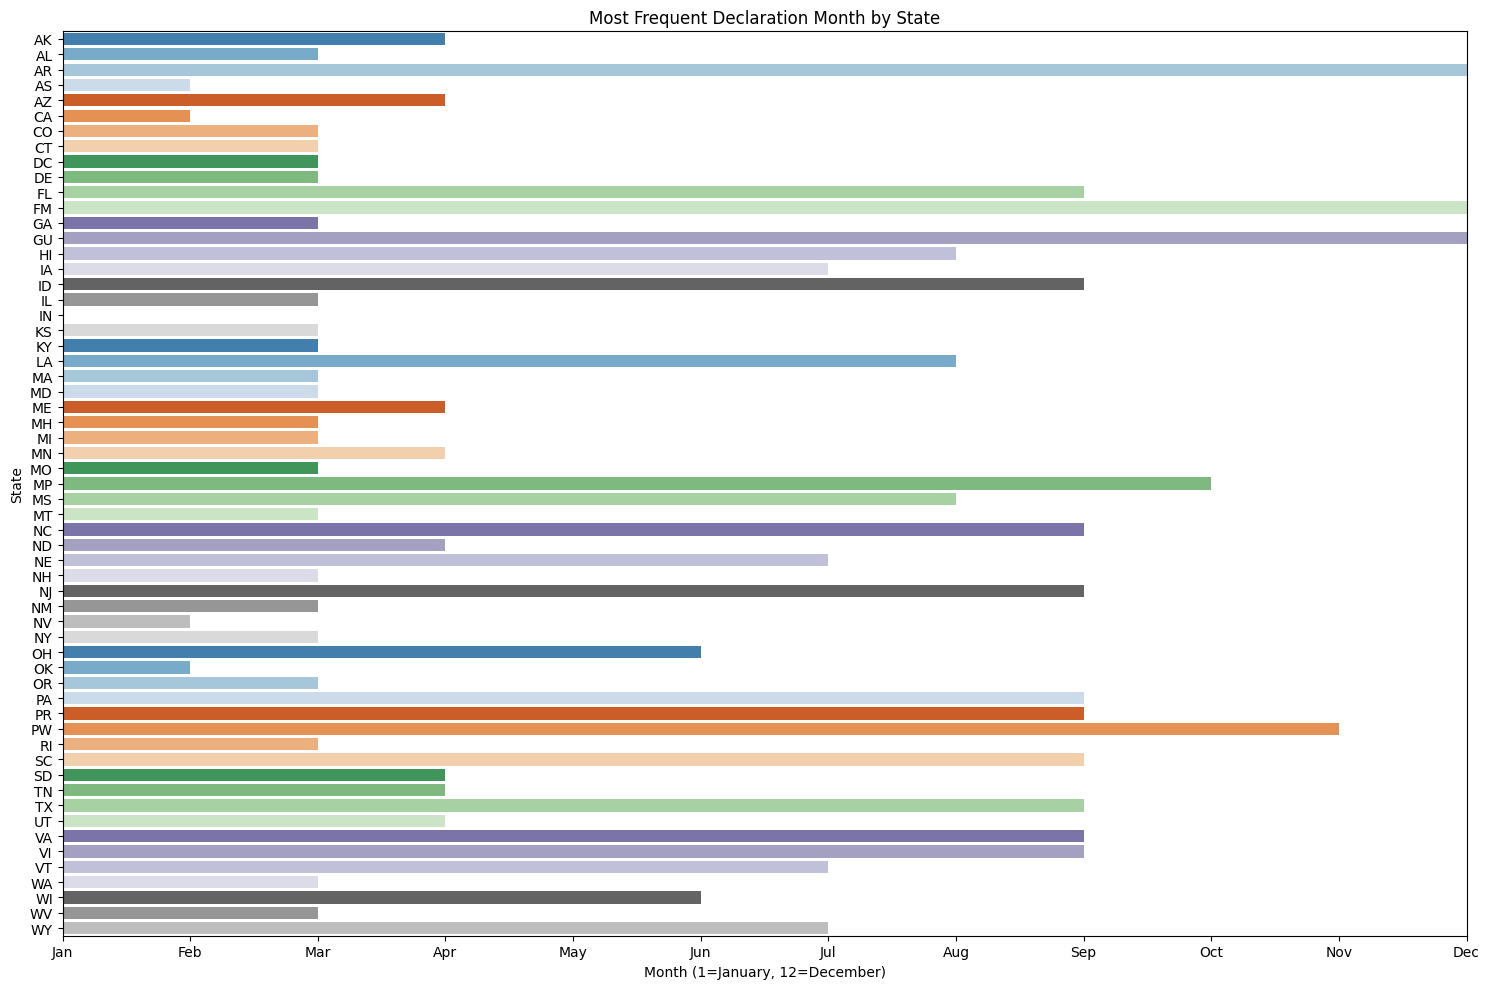

In [86]:
# 1. Calculate the most frequent declaration month for each state
most_frequent_month = df.groupby('state')['monthDeclared'].apply(lambda x: x.mode()[0]).reset_index()

# 2. Plot a bar chart
plt.figure(figsize=(15, 10))
sns.barplot(y='state', x='monthDeclared', data=most_frequent_month, palette='tab20c', orient='h', ci=None)
plt.title('Most Frequent Declaration Month by State')
plt.xlabel('Month (1=January, 12=December)')
plt.ylabel('State')
plt.xlim(1, 12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

#### Top disasters by longest open duration

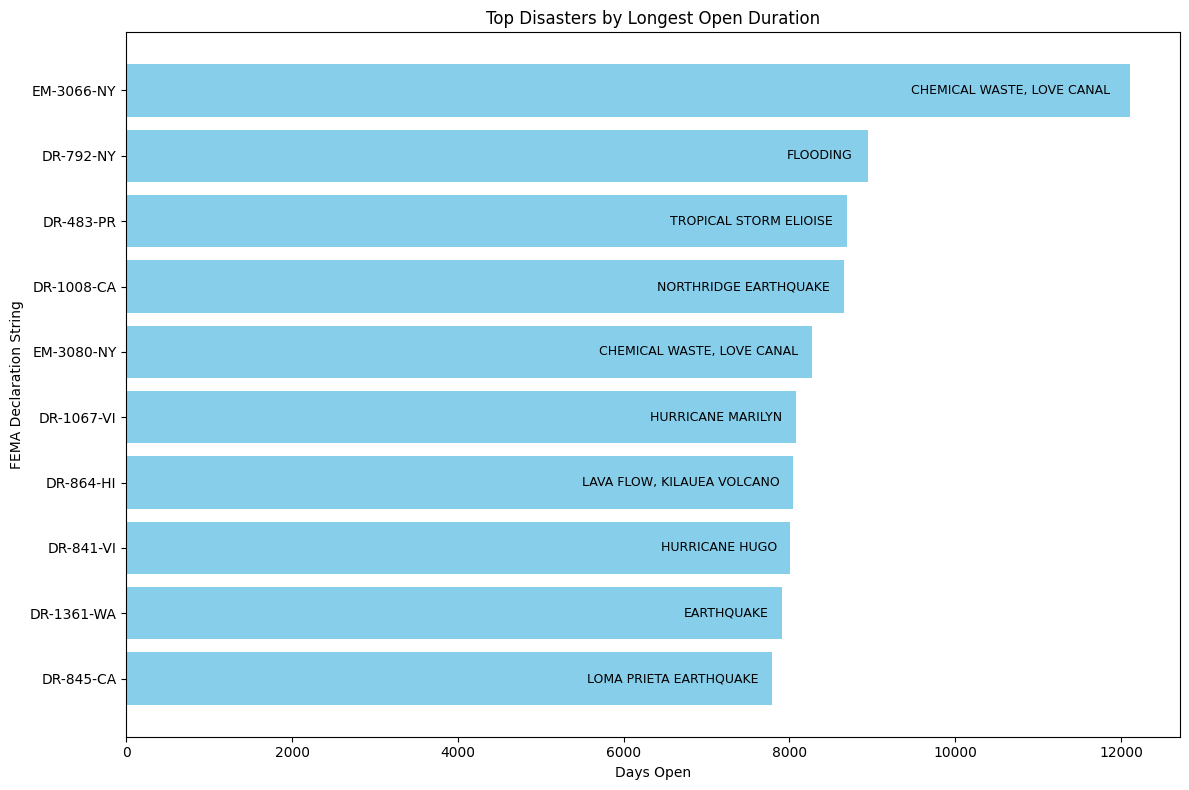

In [92]:
# 1. Filter out rows where disasterCloseoutDate is missing
df_clean = df.dropna(subset=['disasterCloseoutDate'])

# Drop duplicates, keeping only the first occurrence for each femaDeclarationString
df_clean = df_clean.drop_duplicates(subset='femaDeclarationString', keep='first')

# 3. Sort the results in descending order
df_sorted = df_clean.sort_values(by='openDuration', ascending=False)

# 4. Plot the top entries (for example, the top 10)
top_n = 10
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.barh(df_sorted['femaDeclarationString'].head(top_n), df_sorted['openDuration'].head(top_n), color='skyblue')

# Annotating bars with declarationTitle
for bar, title in zip(bars, df_sorted['declarationTitle'].head(top_n)):
    ax.text(bar.get_width() - (0.02 * bar.get_width()),  # Adjust this for the text position inside the bar
            bar.get_y() + bar.get_height()/2,
            title,
            ha='right', va='center',
            color='black', fontsize=9)

plt.xlabel('Days Open')
plt.ylabel('FEMA Declaration String')
plt.title('Top Disasters by Longest Open Duration')
plt.gca().invert_yaxis()  # To have the longest durations at the top
plt.tight_layout()
plt.show()

#### Selected Summary Statistics

In [98]:
df['openDuration'].describe()

count    48705.000000
mean      2372.838086
std       1636.774250
min      -1335.000000
25%        981.000000
50%       2253.000000
75%       3455.000000
max      12107.000000
Name: openDuration, dtype: float64

In [99]:
df['incidentDuration'].describe()

count    64351.000000
mean       167.369054
std        389.556621
min         -7.000000
25%          3.000000
50%         13.000000
75%         42.000000
max       5117.000000
Name: incidentDuration, dtype: float64